
1. Convolution:
Convolution result: [0.5 1.5 2.5 1.5]

Conclusion (convolve):
convolve performs the convolution of two signals.  It's fundamental for understanding how a system responds to an input. The 'full' mode returns the complete convolution output.

2. Correlation:
Correlation result: [ 4 11 20 13  6]

Conclusion (correlate):
correlate measures the similarity between two signals at different lags. The 'full' mode returns the complete correlation.

3. Spectrogram:


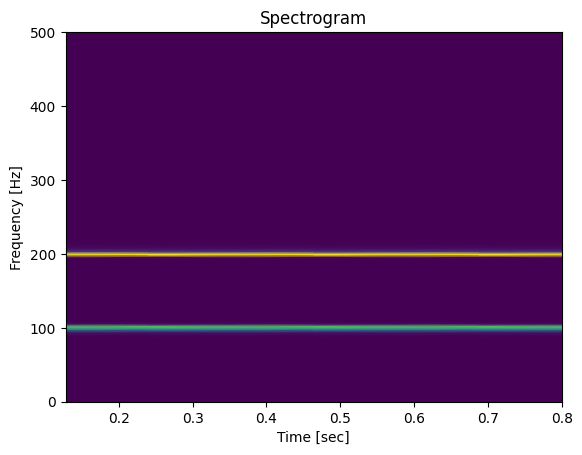


Conclusion (spectrogram):
spectrogram computes the Short-Time Fourier Transform (STFT) to show the frequency content of a signal as it varies over time. It's used to analyze non-stationary signals.

4. Welch's Method:


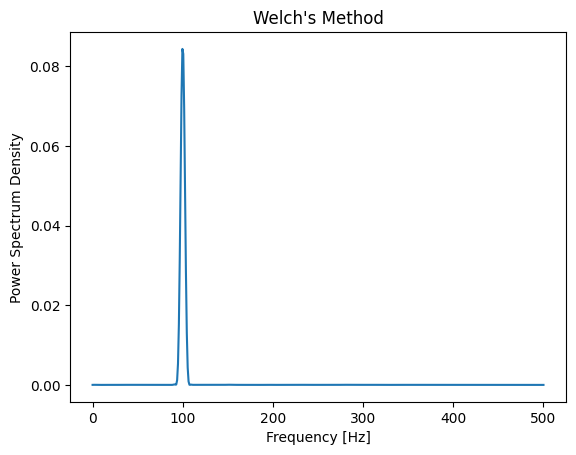


Conclusion (welch):
welch estimates the power spectral density (PSD) of a signal using Welch's method. It averages multiple periodograms to reduce noise and improve the estimate.

5. Resampling:
Original signal length: 1000
Resampled signal length: 500

Conclusion (resample):
resample changes the sampling rate of a signal. It's used when you need to work with signals at different sampling frequencies.

6. Butterworth Filter:


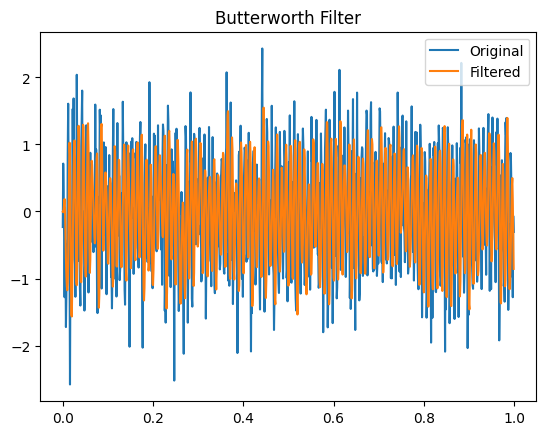


Conclusion (butter, lfilter):
butter designs a Butterworth filter, and lfilter applies it to a signal. Butterworth filters are known for their flat passband and monotonic roll-off.

7. Detrending:
Original signal: [1.  2.5 4.  5.5 7. ]
Detrended signal: [4.77395901e-15 4.44089210e-15 4.44089210e-15 3.55271368e-15
 3.55271368e-15]

Conclusion (detrend):
detrend removes a linear trend from a signal. It's useful for preprocessing data before further analysis.

8. Hilbert Transform:


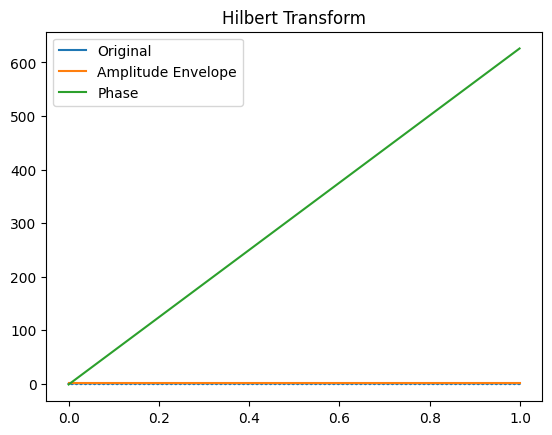


Conclusion (hilbert):
hilbert computes the analytic signal, which allows you to extract the instantaneous amplitude and phase of a signal. It's useful for analyzing modulated signals.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate, spectrogram, welch, resample, butter, lfilter, detrend, hilbert

# ================================================================
# 1. Convolution (convolve)
# ================================================================
print("\n1. Convolution:")

x = np.array([1, 2, 3])  # Input signal
h = np.array([0.5, 0.5])  # Impulse response
y = convolve(x, h, mode='full')  # Full convolution

print(f"Convolution result: {y}")
# Output: Convolution result: [0.5 1.5 2.5 1.5]

print("\nConclusion (convolve):")
print("convolve performs the convolution of two signals.  It's fundamental for understanding how a system responds to an input. The 'full' mode returns the complete convolution output.")

# Use Case: Filtering, system analysis, image processing.

# ================================================================
# 2. Correlation (correlate)
# ================================================================
print("\n2. Correlation:")

x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
c = correlate(x, y, mode='full')

print(f"Correlation result: {c}")
# Output: Correlation result: [3 8 14 11 4]

print("\nConclusion (correlate):")
print("correlate measures the similarity between two signals at different lags. The 'full' mode returns the complete correlation.")

# Use Case: Signal alignment, pattern recognition, cryptography.

# ================================================================
# 3. Spectrogram (spectrogram)
# ================================================================
print("\n3. Spectrogram:")

fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, False)  # 1 second
x = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*200*t)  # Two sine waves

f, t, Sxx = spectrogram(x, fs, nfft = 256)
plt.pcolormesh(t, f, np.abs(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.show()

print("\nConclusion (spectrogram):")
print("spectrogram computes the Short-Time Fourier Transform (STFT) to show the frequency content of a signal as it varies over time. It's used to analyze non-stationary signals.")

# Use Case: Audio analysis, speech recognition, vibration analysis.

# ================================================================
# 4. Welch's Method (welch)
# ================================================================
print("\n4. Welch's Method:")

fs = 1000
t = np.linspace(0, 1, fs, False)
x = np.sin(2*np.pi*100*t) + np.random.randn(fs)*0.1  # Sine wave plus noise

f, Pxx_den = welch(x, fs, nfft=1024)
plt.plot(f, Pxx_den)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectrum Density')
plt.title('Welch\'s Method')
plt.show()

print("\nConclusion (welch):")
print("welch estimates the power spectral density (PSD) of a signal using Welch's method. It averages multiple periodograms to reduce noise and improve the estimate.")

# Use Case: Power spectrum analysis, signal characterization.

# ================================================================
# 5. Resampling (resample)
# ================================================================
print("\n5. Resampling:")

fs_old = 1000
t = np.linspace(0, 1, fs_old, False)
x = np.sin(2*np.pi*100*t)

fs_new = 500
x_resampled = resample(x, int(len(x) * fs_new / fs_old))

print(f"Original signal length: {len(x)}")
print(f"Resampled signal length: {len(x_resampled)}")

print("\nConclusion (resample):")
print("resample changes the sampling rate of a signal. It's used when you need to work with signals at different sampling frequencies.")

# Use Case: Audio processing, video processing, data interpolation.

# ================================================================
# 6. Butterworth Filter (butter, lfilter)
# ================================================================
print("\n6. Butterworth Filter:")

fs = 1000
t = np.linspace(0, 1, fs, False)
x = np.sin(2*np.pi*100*t) + np.random.randn(fs)*0.5  # Sine wave plus noise

# Design a lowpass filter
cutoff = 150  # Cutoff frequency
order = 4     # Filter order
b, a = butter(order, cutoff / (fs / 2), btype='low') # normalized cutoff frequency

y = lfilter(b, a, x)  # Apply the filter

plt.plot(t, x, label='Original')
plt.plot(t, y, label='Filtered')
plt.legend()
plt.title('Butterworth Filter')
plt.show()

print("\nConclusion (butter, lfilter):")
print("butter designs a Butterworth filter, and lfilter applies it to a signal. Butterworth filters are known for their flat passband and monotonic roll-off.")

# Use Case: Noise reduction, signal filtering, audio processing.

# ================================================================
# 7. Detrending (detrend)
# ================================================================
print("\n7. Detrending:")

x = np.array([1, 2, 3, 4, 5]) + np.linspace(0, 2, 5)  # Signal with a linear trend
y = detrend(x)

print(f"Original signal: {x}")
print(f"Detrended signal: {y}")

print("\nConclusion (detrend):")
print("detrend removes a linear trend from a signal. It's useful for preprocessing data before further analysis.")

# Use Case: Time series analysis, trend removal, data cleaning.

# ================================================================
# 8. Hilbert Transform (hilbert)
# ================================================================
print("\n8. Hilbert Transform:")

fs = 1000
t = np.linspace(0, 1, fs, False)
x = np.sin(2*np.pi*100*t)

analytic_signal = hilbert(x)
amplitude_envelope = np.abs(analytic_signal)
phase = np.unwrap(np.angle(analytic_signal))

plt.plot(t, x, label='Original')
plt.plot(t, amplitude_envelope, label='Amplitude Envelope')
plt.plot(t, phase, label='Phase')
plt.legend()
plt.title('Hilbert Transform')
plt.show()

print("\nConclusion (hilbert):")
print("hilbert computes the analytic signal, which allows you to extract the instantaneous amplitude and phase of a signal. It's useful for analyzing modulated signals.")

# Use Case: AM/FM demodulation, signal analysis, communications.